# User Profile Cluster Analysis

#### Profile Table

In [1]:
PROFILE_DATA = "new_arch/user_profile_200"
USER_LOOKUP = "data/user_lookup.json"

SENATE_TABLE = "data/congress_twitter_117th_senate.csv"
HOUSE_TABLE = "data/congress_twitter_117th_house.csv"
US_FIGURE_TABLE = "data/us_figures.csv"

In [2]:
import numpy as np

profiles = np.loadtxt(fname=PROFILE_DATA)
profiles.shape


(583, 5)

In [3]:
import json

user_lookup = json.load(fp=open(file=USER_LOOKUP, mode="r"))
user_lookup


{'0': 'AlLawsonJr',
 '1': 'AlbioSiresNJ',
 '2': 'AndrewJBates46',
 '3': 'Atrios',
 '4': 'AustinScottGA08',
 '5': 'BarackObama',
 '6': 'BennieGThompson',
 '7': 'BettyMcCollum04',
 '8': 'BillClinton',
 '9': 'BillPascrell',
 '10': 'BobbyScott',
 '11': 'BradSherman',
 '12': 'Call_Me_Dutch',
 '13': 'ChrisCoons',
 '14': 'ChrisMurphyCT',
 '15': 'ChrisVanHollen',
 '16': 'ChuckGrassley',
 '17': 'CongBoyle',
 '18': 'CongMikeSimpson',
 '19': 'CongPalazzo',
 '20': 'CongressmanGT',
 '21': 'CongressmanHice',
 '22': 'CongressmanRaja',
 '23': 'Congressman_JVD',
 '24': 'CongresswomanSC',
 '25': 'ConorLambPA',
 '26': 'CookPolitical',
 '27': 'CoryBooker',
 '28': 'DesJarlaisTN04',
 '29': 'DonaldNorcross',
 '30': 'DorisMatsui',
 '31': 'DrNealDunnFL2',
 '32': 'EleanorNorton',
 '33': 'ErinMcPike',
 '34': 'FrankPallone',
 '35': 'GKButterfield',
 '36': 'GOPLeader',
 '37': 'GReschenthaler',
 '38': 'GerryConnolly',
 '39': 'GuamCongressman',
 '40': 'HawleyMO',
 '41': 'Heminator',
 '42': 'HerreraBeutler',
 '43': '

In [4]:
import pandas as pd
from typing import Dict

def BuildUserProfileTable(profile_vectors: np.ndarray,
                          user_lookup: Dict[int, str]) -> pd.DataFrame:
    user_id_col = list()
    user_name_col = list()
    profile_vector_col = list()

    for i in range(profile_vectors.shape[0]):
        user_id_col.append(i)
        user_name_col.append(user_lookup[str(i)])
        profile_vector_col.append(profile_vectors[i])
    
    return pd.DataFrame(data={
        "user_id": user_id_col,
        "user_name": user_name_col,
        "profile": profile_vector_col,
    })

profile_df = BuildUserProfileTable(
    profile_vectors=profiles,
    user_lookup=user_lookup)

profile_df


,user_id,user_name,profile
0,0,AlLawsonJr,"[-0.23613128066062927, -0.19566763937473297, 0..."
1,1,AlbioSiresNJ,"[0.33249402046203613, 1.5923086404800415, -0.4..."
2,2,AndrewJBates46,"[-0.7338877320289612, -0.27654561400413513, -0..."
3,3,Atrios,"[-1.2900638580322266, -2.2192771434783936, 0.8..."
4,4,AustinScottGA08,"[0.2934272587299347, 0.3835015594959259, 0.314..."
...,...,...,...
578,578,sethmoulton,"[-0.6030548810958862, 0.004100670572370291, 0...."
579,579,stevebenen,"[-1.422316312789917, -0.6569629907608032, -0.0..."
580,580,thegarance,"[-1.1271378993988037, -1.3201956748962402, 0.0..."
581,581,timkaine,"[-0.47588515281677246, 0.3875916302204132, 0.1..."


#### User Features

In [5]:
senate_df = pd.read_csv(SENATE_TABLE)
house_df = pd.read_csv(HOUSE_TABLE)
us_figure_df = pd.read_csv(US_FIGURE_TABLE)

In [6]:
senate_df["congressman"] = True
senate_df

,Name,Link,State,Party,congressman
0,"Baldwin, Tammy",https://twitter.com/SenatorBaldwin,WI,D,True
1,"Barrasso, John",https://twitter.com/SenJohnBarrasso,WY,R,True
2,"Bennet, Michael F.",https://twitter.com/SenatorBennet,CO,D,True
3,"Blackburn, Marsha",https://twitter.com/MarshaBlackburn,TN,R,True
4,"Blumenthal, Richard",https://twitter.com/SenBlumenthal,CT,D,True
...,...,...,...,...,...
95,"Warren, Elizabeth",https://twitter.com/SenWarren,MA,D,True
96,"Whitehouse, Sheldon",https://twitter.com/SenWhitehouse,RI,D,True
97,"Wicker, Roger F.",https://twitter.com/SenatorWicker,MS,R,True
98,"Wyden, Ron",https://twitter.com/RonWyden,OR,D,True


In [7]:
house_df["congressman"] = True
house_df

,Name,Link,State,Party,congressman
0,"Adams, Alma",https://twitter.com/RepAdams,NC,D,True
1,"Aderholt, Robert",https://twitter.com/Robert_Aderholt,AL,R,True
2,"Aguilar, Pete",https://twitter.com/RepPeteAguilar,CA,D,True
3,"Allen, Rick",https://twitter.com/RepRickAllen,GA,R,True
4,"Allred, Colin",https://twitter.com/RepColinAllred,TX,D,True
...,...,...,...,...,...
426,"Wittman, Robert J.",https://twitter.com/RobWittman,VA,R,True
427,"Womack, Steve",https://twitter.com/rep_stevewomack,AR,R,True
428,"Yakym, Rudy",https://twitter.com/RudyYakym,IN,R,True
429,"Yarmuth, John A.",https://twitter.com/RepJohnYarmuth,KY,D,True


In [8]:
us_figure_df["congressman"] = False
us_figure_df

,Name,Link,Party,congressman
0,President Biden,https://twitter.com/POTUS,D,False
1,"Biden, Joe",https://twitter.com/JoeBiden,D,False
2,President Trump 45,https://twitter.com/POTUS45,R,False
3,President Obama 44,https://twitter.com/POTUS44,D,False
4,"Obama, Barack",https://twitter.com/BarackObama,D,False
5,George W. Bush Presidential Center,https://twitter.com/TheBushCenter,R,False
6,"Clinton, Hillary",https://twitter.com/HillaryClinton,D,False
7,"Clinton, Bill",https://twitter.com/BillClinton,D,False
8,"Jean-Pierre, Karine Official",https://twitter.com/PressSec,D,False
9,"Jean-Pierre, Karine",https://twitter.com/kjp46,D,False


In [9]:
from typing import List

def BuildFeatureTable(tables: List[pd.DataFrame]) -> pd.DataFrame:
    result = pd.DataFrame(data={
        "user_name": list(), 
        "party": list(),
        "state": list(),
        "congressman": list(),
    })

    for table in tables:
        user_name_col = table.Link.map(lambda link : link.split("/")[-1])
        party_col = table.Party
        state_col = table.State if "State" in table.columns else ["UNK"]*user_name_col.shape[0]
        congressman_col = table.congressman


        df = pd.DataFrame(data={
            "user_name": user_name_col,
            "party": party_col,
            "state": state_col,
            "congressman": congressman_col,
        })

        result = pd.concat(objs=[result, df])
    
    return result


feature_df = BuildFeatureTable(tables=[senate_df, house_df, us_figure_df])
feature_df.shape


/var/folders/sz/9srczfvn0yz_pdmqjv8hxxs40000gn/T/ipykernel_69256/4251757802.py:25: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  result = pd.concat(objs=[result, df])


(583, 4)

#### Feature Prediction

In [10]:
feature_and_profile = pd.merge(left=feature_df, right=profile_df, on="user_name", how="inner")
feature_and_profile.sort_values(by="user_id", inplace=True)
feature_and_profile


,user_name,party,state,congressman,user_id,profile
330,AlLawsonJr,D,FL,1.0,0,"[-0.23613128066062927, -0.19566763937473297, 0..."
463,AlbioSiresNJ,D,NJ,1.0,1,"[0.33249402046203613, 1.5923086404800415, -0.4..."
543,AndrewJBates46,D,UNK,0.0,2,"[-0.7338877320289612, -0.27654561400413513, -0..."
568,Atrios,D,UNK,0.0,3,"[-1.2900638580322266, -2.2192771434783936, 0.8..."
455,AustinScottGA08,R,GA,1.0,4,"[0.2934272587299347, 0.3835015594959259, 0.314..."
...,...,...,...,...,...,...
381,sethmoulton,D,MA,1.0,578,"[-0.6030548810958862, 0.004100670572370291, 0...."
571,stevebenen,D,UNK,0.0,579,"[-1.422316312789917, -0.6569629907608032, -0.0..."
554,thegarance,D,UNK,0.0,580,"[-1.1271378993988037, -1.3201956748962402, 0.0..."
44,timkaine,D,VA,1.0,581,"[-0.47588515281677246, 0.3875916302204132, 0.1..."


In [25]:
from sklearn.model_selection import train_test_split
import numpy as np

profiles = np.vstack(feature_and_profile.profile)
party_labels = feature_and_profile.party.to_numpy()

profiles_train, profiles_test, labels_train, labels_test = train_test_split(
    profiles, party_labels, random_state=42, test_size=0.2)


In [33]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

party_model = GradientBoostingClassifier()
party_model.fit(profiles_train, labels_train)

labels_pred = party_model.predict(X=profiles_test)
report = classification_report(y_true=labels_test, y_pred=labels_pred)
print(report)


              precision    recall  f1-score   support

           D       0.89      0.92      0.91        64
           I       0.50      0.33      0.40         3
           R       0.90      0.88      0.89        50

    accuracy                           0.89       117
   macro avg       0.76      0.71      0.73       117
weighted avg       0.89      0.89      0.89       117



In [34]:
party_model.feature_importances_

array([0.32478563, 0.02194174, 0.49548376, 0.03198636, 0.12580252])

In [14]:
congressman_labels = feature_and_profile.congressman.to_numpy()

profiles_train, profiles_test, labels_train, labels_test = train_test_split(
    profiles, congressman_labels, test_size=0.2, random_state=42)

congressman_model = GradientBoostingClassifier()
congressman_model.fit(profiles_train, labels_train)

labels_pred = congressman_model.predict(X=profiles_test)
report = classification_report(y_true=labels_test, y_pred=labels_pred)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        13
         1.0       0.97      1.00      0.99       104

    accuracy                           0.97       117
   macro avg       0.99      0.88      0.93       117
weighted avg       0.98      0.97      0.97       117



In [15]:
congressman_model.feature_importances_


array([0.86768573, 0.0148249 , 0.02495393, 0.03993868, 0.05259676])

#### Profile Structure Visualization

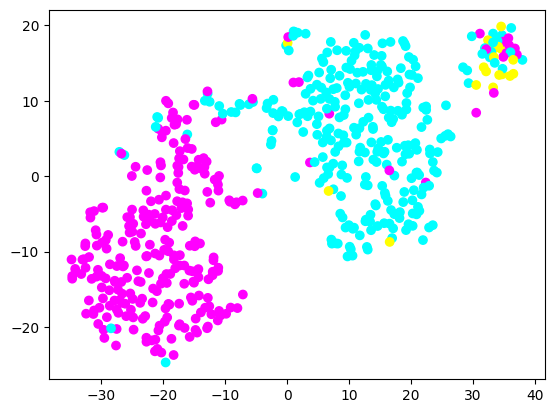

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
vis_embed = tsne.fit_transform(profiles)

cdict = {"R": "magenta", "D": "cyan", "I": "yellow"}
party_colors = [cdict[label] for label in party_labels]

plt.scatter(vis_embed[:, 0], vis_embed[:, 1], c=party_colors)


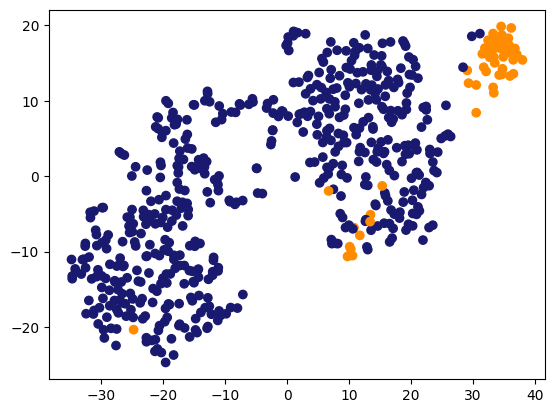

In [17]:
congressman_colors = ["darkorange" if label == 0.0 else "midnightblue" for label in congressman_labels]

plt.scatter(vis_embed[:, 0], vis_embed[:, 1], c=congressman_colors)


MovieWriter imagemagick unavailable; using Pillow instead.


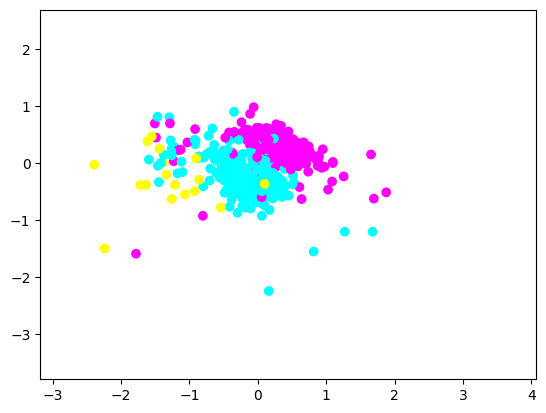

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
sc = None

def update(frame):
    profile_data = np.loadtxt(fname="new_arch/user_profile_" + str(frame))

    global sc
    if sc is None:
        sc = ax.scatter(profile_data[:, 0], profile_data[:, 2], c=party_colors)
    else:
        sc.set_offsets(np.c_[profile_data[:, 0], profile_data[:, 2]])

    return sc,


# Create the animation
ani = FuncAnimation(fig, update, frames=200, interval=100, blit=True)

# Save the animation as a GIF
ani.save('profile-w-party-label2.gif', writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


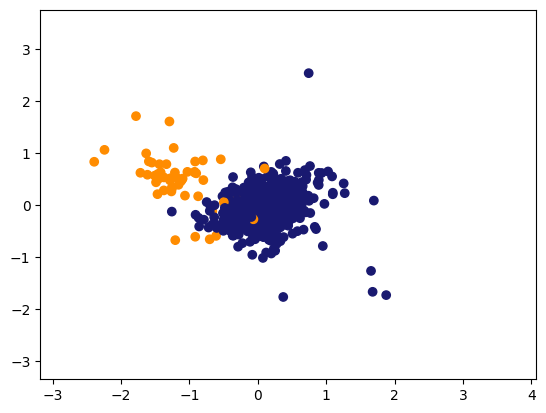

In [19]:
fig, ax = plt.subplots()
sc = None


def update(frame):
    profile_data = np.loadtxt(fname="new_arch/user_profile_" + str(frame))

    global sc
    if sc is None:
        sc = ax.scatter(profile_data[:, 0], profile_data[:, 4], c=congressman_colors)
    else:
        sc.set_offsets(np.c_[profile_data[:, 0], profile_data[:, 4]])

    return sc,


# Create the animation
ani = FuncAnimation(fig, update, frames=200, interval=100, blit=True)

# Save the animation as a GIF
ani.save('profile-w-congressman-label2.gif', writer='imagemagick')
